In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame with specified encoding
df = pd.read_csv("spam.csv", encoding='latin1')


In [3]:
import os

# File path of the dataset
file_path = "spam.csv"  # Change this to your actual file name

# Check if the file exists
if os.path.exists(file_path):
    print("Dataset file exists.")
else:
    print("Dataset file does not exist.")


Dataset file exists.


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Specify the columns to remove
columns_to_remove = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Remove the specified columns from the DataFrame
df.drop(columns=columns_to_remove, inplace=True)

# Optionally, if you want to create a new DataFrame without modifying the original one:
# new_df = df.drop(columns=columns_to_remove)


In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame called df

# Check for missing values
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print("Missing values per column:")
print(missing_values)

# Optionally, you can calculate the percentage of missing values
# total_cells = df.size
# total_missing = missing_values.sum()
# percentage_missing = (total_missing / total_cells) * 100
# print(f"Percentage of missing values: {percentage_missing:.2f}%")


Missing values per column:
v1    0
v2    0
dtype: int64


In [10]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


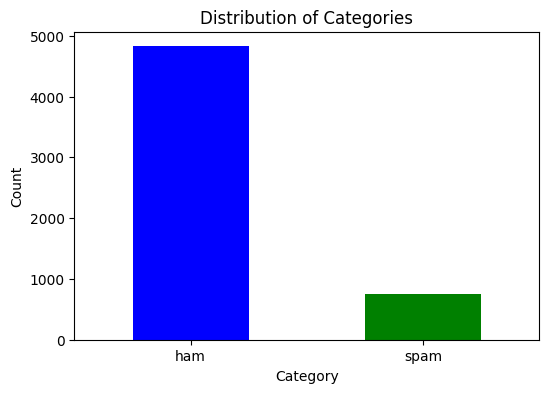

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
df['v1'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


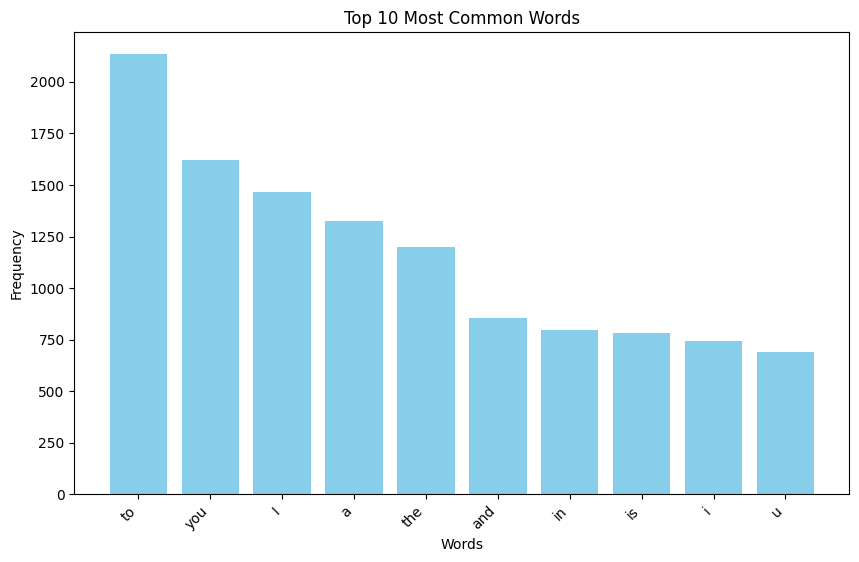

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate all text messages into a single string
text = ' '.join(df['v2'].tolist())

# Tokenize the text (split it into individual words)
words = text.split()

# Calculate the frequency of each word
word_freq = Counter(words)

# Get the top N most common words
top_n = 10  # Change this to visualize more or fewer words
top_words = word_freq.most_common(top_n)

# Extract words and frequencies
words, freqs = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='skyblue')
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


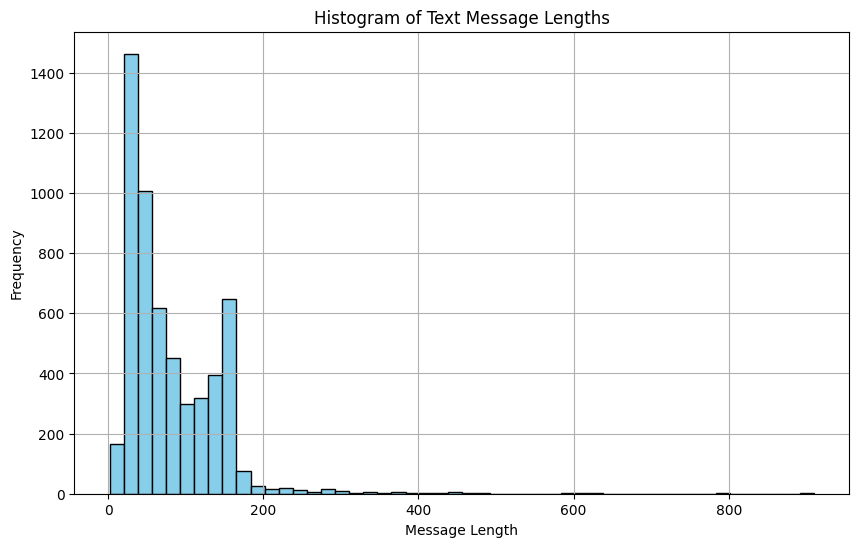

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the length of each text message
df['message_length'] = df['v2'].apply(lambda x: len(x))

# Create a histogram of text message lengths
plt.figure(figsize=(10, 6))
plt.hist(df['message_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Text Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:
import pandas as pd

# Calculate text length for each message
df['text_length'] = df['v2'].apply(lambda x: len(x))

# Identify outliers based on text length
mean_length = df['text_length'].mean()
std_length = df['text_length'].std()
threshold_length = mean_length + 3 * std_length  # Adjust the threshold as needed
outliers_length = df[df['text_length'] > threshold_length]

# Identify outliers based on word frequency
from collections import Counter
words = ' '.join(df['v2']).split()
word_counts = Counter(words)
common_words = [word for word, count in word_counts.most_common(100)]  # Adjust the number of common words as needed
outliers_words = df[df['v2'].apply(lambda x: any(word not in common_words for word in x.split()))]

# Display outliers
print("Outliers based on text length:")
print(outliers_length[['v1', 'v2', 'text_length']])
print("\nOutliers based on word frequency:")
print(outliers_words[['v1', 'v2']])


Outliers based on text length:
       v1                                                 v2  text_length
53    ham  Wow. I never realized that you were so embaras...          291
154   ham  You are everywhere dirt, on the floor, the win...          384
380   ham  I guess that's why you re worried. You must kn...          300
472   ham  Nothing. I meant that once the money enters yo...          298
550   ham  Imagine you finally get to sink into that bath...          281
...   ...                                                ...          ...
5129  ham  Rose for red,red for blood,blood for heart,hea...          281
5209  ham  I know you are thinkin malaria. But relax, chi...          329
5264  ham  Storming msg: Wen u lift d phne, u say \HELLO\...          278
5535  ham  I know you are thinkin malaria. But relax, chi...          329
5557  ham  No. I meant the calculation is the same. That ...          273

[64 rows x 3 columns]

Outliers based on word frequency:
        v1             

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file into a pandas DataFrame with specified encoding
df = pd.read_csv("spam.csv", encoding='latin1')

# Split the dataset into training (60%), validation (20%), and testing (20%) sets
train_val, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Optionally, perform any preprocessing steps on each subset

# Example: Print the sizes of the subsets
print("Training set size:", len(train))
print("Validation set size:", len(val))
print("Testing set size:", len(test))

# Now you can use the 'train' subset for training your models,
# 'val' subset for hyperparameter tuning or model selection,
# and 'test' subset for evaluating the performance of your trained models.


Training set size: 3342
Validation set size: 1115
Testing set size: 1115


In [16]:
train

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3285,ham,Not to worry. I'm sure you'll get it.,NaN,NaN,NaN
5278,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN
4194,spam,Double mins and txts 4 6months FREE Bluetooth ...,NaN,NaN,NaN
2708,ham,"Nah, I'm a perpetual DD",NaN,NaN,NaN
1891,ham,Probably earlier than that if the station's wh...,NaN,NaN,NaN
...,...,...,...,...,...
975,ham,Hey no I ad a crap nite was borin without ya 2...,NaN,NaN,NaN
1135,ham,K do I need a login or anything,NaN,NaN,NaN
1704,ham,What can i do? Might accidant tookplace betwee...,NaN,NaN,NaN
1574,ham,My sis is catching e show in e afternoon so i'...,NaN,NaN,NaN


In [17]:
val

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3483,ham,Tell my bad character which u Dnt lik in me. ...,NaN,NaN,NaN
5229,ham,It means u could not keep ur words.,NaN,NaN,NaN
784,ham,Dont think so. It turns off like randomlly wit...,NaN,NaN,NaN
1433,ham,You intrepid duo you! Have a great time and se...,NaN,NaN,NaN
5318,ham,"Good morning, my Love ... I go to sleep now an...",NaN,NaN,NaN
...,...,...,...,...,...
2058,ham,Ugh fuck it I'm resubbing to eve,NaN,NaN,NaN
1585,ham,I was wondering if it would be okay for you to...,NaN,NaN,NaN
3432,ham,Christmas is An occasion that is Celebrated as...,NaN,NaN,NaN
5286,ham,I'm still pretty weak today .. Bad day ?,NaN,NaN,NaN


In [18]:
test

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t...",NaN,NaN,NaN
944,ham,I sent my scores to sophas and i had to do sec...,NaN,NaN,NaN
1044,spam,We know someone who you know that fancies you....,NaN,NaN,NaN
2484,ham,Only if you promise your getting out as SOON a...,NaN,NaN,NaN
812,spam,Congratulations ur awarded either å£500 of CD ...,NaN,NaN,NaN
...,...,...,...,...,...
4264,ham,&lt;DECIMAL&gt; m but its not a common car he...,NaN,NaN,NaN
2439,ham,Rightio. 11.48 it is then. Well arent we all u...,NaN,NaN,NaN
5556,ham,Yes i have. So that's why u texted. Pshew...mi...,NaN,NaN,NaN
4205,ham,"Get the door, I'm here",NaN,NaN,NaN


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train['v2'])

# Transform the validation and testing data using the same vectorizer
X_val_tfidf = tfidf_vectorizer.transform(val['v2'])
X_test_tfidf = tfidf_vectorizer.transform(test['v2'])

# Optionally, you can also obtain the labels for each subset
y_train = train['v1']
y_val = val['v1']
y_test = test['v1']


In [20]:
X_train_tfidf

<3342x6573 sparse matrix of type '<class 'numpy.float64'>'
	with 44243 stored elements in Compressed Sparse Row format>

In [21]:
X_val_tfidf

<1115x6573 sparse matrix of type '<class 'numpy.float64'>'
	with 13494 stored elements in Compressed Sparse Row format>

In [22]:
X_test_tfidf

<1115x6573 sparse matrix of type '<class 'numpy.float64'>'
	with 13743 stored elements in Compressed Sparse Row format>

In [23]:
y_train


3285     ham
5278    spam
4194    spam
2708     ham
1891     ham
        ... 
975      ham
1135     ham
1704     ham
1574     ham
2917     ham
Name: v1, Length: 3342, dtype: object

In [24]:
y_val

3483    ham
5229    ham
784     ham
1433    ham
5318    ham
       ... 
2058    ham
1585    ham
3432    ham
5286    ham
1051    ham
Name: v1, Length: 1115, dtype: object

In [25]:
y_test

3245     ham
944      ham
1044    spam
2484     ham
812     spam
        ... 
4264     ham
2439     ham
5556     ham
4205     ham
4293    spam
Name: v1, Length: 1115, dtype: object

In [26]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Specify the columns to remove
columns_to_remove = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Remove the specified columns from the DataFrame
train.drop(columns=columns_to_remove, inplace=True)
val.drop(columns=columns_to_remove, inplace=True)
test.drop(columns=columns_to_remove, inplace=True)



# Optionally, if you want to create a new DataFrame without modifying the original one:
# new_df = df.drop(columns=columns_to_remove)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression()

# Train the model using the TF-IDF vectorized training data
logistic_regression.fit(X_train_tfidf,y_train)

# Predict labels for the testing data
y_pred = logistic_regression.predict(X_val_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print accuracy
print(" Logistic Regression Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))


 Logistic Regression Accuracy: 0.9659192825112107
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       996
        spam       0.99      0.69      0.81       119

    accuracy                           0.97      1115
   macro avg       0.98      0.84      0.90      1115
weighted avg       0.97      0.97      0.96      1115



In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the Naive Bayes classifier (MultinomialNB for text classification)
naive_bayes = MultinomialNB()

# Train the model using the TF-IDF vectorized training data
naive_bayes.fit(X_train_tfidf, y_train)

# Predict labels for the testing data
y_pred = naive_bayes.predict(X_val_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print accuracy
print(" Naive Bayes Accuracy:", accuracy)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))


 Naive Bayes Accuracy: 0.9605381165919282
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       996
        spam       1.00      0.63      0.77       119

    accuracy                           0.96      1115
   macro avg       0.98      0.82      0.88      1115
weighted avg       0.96      0.96      0.96      1115



In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model using the TF-IDF vectorized training data
svm_classifier.fit(X_train_tfidf, y_train)

# Predict labels for the validation data
y_pred_val = svm_classifier.predict(X_val_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(" SVM Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_val))


 SVM Accuracy: 0.9838565022421525
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       996
        spam       0.99      0.86      0.92       119

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Train the model using the TF-IDF vectorized training data
gradient_boosting.fit(X_train_tfidf, y_train)

# Predict labels for the testing data
y_pred_gb = gradient_boosting.predict(X_val_tfidf)

# Calculate accuracy
accuracy_gb = accuracy_score(y_val, y_pred_gb)

# Print accuracy
print("Gradient Boosting Accuracy:", accuracy_gb)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred_gb))


Gradient Boosting Accuracy: 0.967713004484305
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       996
        spam       0.95      0.74      0.83       119

    accuracy                           0.97      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model using the TF-IDF vectorized training data
random_forest.fit(X_train_tfidf, y_train)

# Predict labels for the testing data
y_pred_rf = random_forest.predict(X_val_tfidf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_val, y_pred_rf)

# Print accuracy
print("Random Forest Accuracy:", accuracy_rf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred_rf))


Random Forest Accuracy: 0.9730941704035875
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       996
        spam       1.00      0.75      0.86       119

    accuracy                           0.97      1115
   macro avg       0.99      0.87      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model using the TF-IDF vectorized training data
decision_tree.fit(X_train_tfidf, y_train)

# Predict labels for the testing data
y_pred_dt = decision_tree.predict(X_val_tfidf)

# Calculate accuracy
accuracy_dt = accuracy_score(y_val, y_pred_dt)

# Print accuracy
print("Decision Tree Accuracy:", accuracy_dt)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred_dt))


Decision Tree Accuracy: 0.9659192825112107
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       996
        spam       0.83      0.85      0.84       119

    accuracy                           0.97      1115
   macro avg       0.91      0.91      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the model using the TF-IDF vectorized training data
knn_classifier.fit(X_train_tfidf, y_train)

# Predict labels for the testing data
y_pred_knn = knn_classifier.predict(X_val_tfidf)

# Calculate accuracy
accuracy_knn = accuracy_score(y_val, y_pred_knn)

# Print accuracy
print("KNN Accuracy:", accuracy_knn)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred_knn))


KNN Accuracy: 0.9147982062780269
Classification Report:
              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       996
        spam       1.00      0.20      0.34       119

    accuracy                           0.91      1115
   macro avg       0.96      0.60      0.65      1115
weighted avg       0.92      0.91      0.89      1115



In [34]:
# Predict labels for the test data using the trained SVM model
y_pred_test = svm_classifier.predict(X_test_tfidf)

In [35]:
y_pred_test

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'spam'], dtype=object)

In [36]:
y_test

3245     ham
944      ham
1044    spam
2484     ham
812     spam
        ... 
4264     ham
2439     ham
5556     ham
4205     ham
4293    spam
Name: v1, Length: 1115, dtype: object